In [5]:
# !pip install ipympl

## Pipeline1 - Data pre-processing

In [5]:
%matplotlib widget

In [ ]:
# add a Dividing Line the following is data visualization


---

In [15]:
# When using the `widget` backend from ipympl,
# fig.canvas is a proper Jupyter interactive widget, which can be embedded in
# an ipywidgets layout. See https://ipywidgets.readthedocs.io/en/stable/examples/Layout%20Templates.html
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
# One can bound figure attributes to other widget values.
from ipywidgets import AppLayout, FloatSlider

plt.ioff()

slider = FloatSlider(
    orientation='horizontal',
    description='Factor:',
    value=1.0,
    min=0.02,
    max=2.0
)

slider.layout.margin = '0px 30% 0px 30%'
slider.layout.width = '40%'

fig = plt.figure()
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title('Plotting: y=sin({} * x)'.format(slider.value))

x = np.linspace(0, 20, 500)

lines = plt.plot(x, np.sin(slider.value * x))

def update_lines(change):
    plt.title('Plotting: y=sin({} * x)'.format(change.new))
    lines[0].set_data(x, np.sin(change.new * x))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)

AppLayout(children=(FloatSlider(value=1.0, description='Factor:', layout=Layout(grid_area='footer', margin='0p…

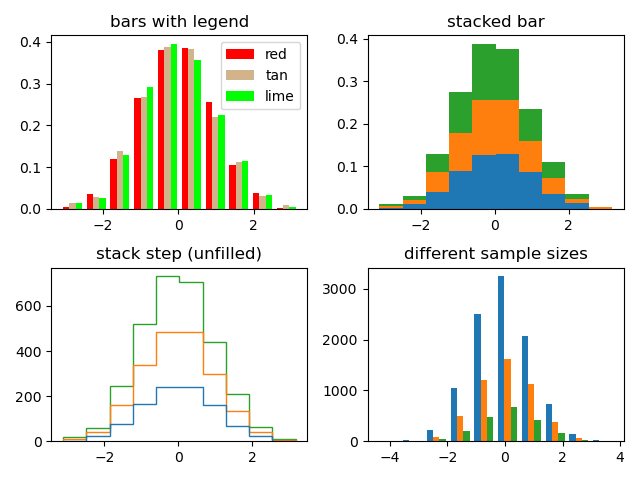

In [2]:
# A more complex example from the matplotlib gallery
np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

In [28]:
# Here define the data source
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
X = iris.data
y = iris.target
# add x and y to the dataframe
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

In [3]:
import numpy as np
import pandas as pd
from IPython.display import display
import bqplot as bqp
from bqplot import pyplot as plt
from ipywidgets import AppLayout, Dropdown, HBox, VBox, Output

def plot_distribution(data, columns, n, m):
    # Create the histogram figures
    figures = []
    for i, col_name in enumerate(columns):
        fig = plt.figure(title=f"{col_name} Distribution")
        hist = plt.hist(data[col_name], bins=30, colors=['steelblue'], density=True)
        plt.xlabel(col_name)
        plt.ylabel("Frequency")
        plt.show()
        figures.append(fig)

    # Create the dropdown widgets
    dropdowns = [Dropdown(options=columns, description="Select column", layout={'width': 'max-content'}) for _ in range(n * m)]
    
    # Update the corresponding figure when dropdown value is changed
    def on_change(change):
        idx = dropdowns.index(change.owner)
        col_name = change.new
        hist = plt.hist(data[col_name], bins=30, colors=['steelblue'], density=True)
        figures[idx].title = f"{col_name} Distribution"
        figures[idx].marks[0].sample = hist[0]
        figures[idx].marks[0].scales['sample'].min = hist[1].min()
        figures[idx].marks[0].scales['sample'].max = hist[1].max()

    for dropdown in dropdowns:
        dropdown.observe(on_change, 'value')

    # Organize the layout
    rows = [HBox([VBox([dropdowns[m * i + j], figures[m * i + j]]) for j in range(m)]) for i in range(n)]
    layout = VBox(rows)
    display(layout)

# Generate a sample dataset
# data = pd.DataFrame(np.random.randn(100, 12), columns=[f"Feature {i}" for i in range(1, 13)])
data = df

columns = data.columns
# there are 5 columns
n = 2
m= 2

plot_distribution(data, columns, n, m)


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import ipywidgets as widgets
# from IPython.display import display

# # Create a file uploader widget
# uploader = widgets.FileUpload(
#     accept='.csv',  # Accepted file extension
#     multiple=False  # Only accept single file
# )

# display(uploader)

# def show_head_tail(df, n=5):
#     print("Head:")
#     print(df.head(n))
#     print("\nTail:")
#     print(df.tail(n))

# # Plot the distribution of all columns
# def plot_distribution(df):
#     for col in df.columns:
#         plt.figure()
#         plt.title(f'Distribution of {col}')
#         df[col].hist()
#         plt.xlabel(col)
#         plt.ylabel('Frequency')
#         plt.show()



# # Analyze the dataset
# def analyze_data(df):
#     print("Summary statistics:")
#     print(df.describe())

#     print("\nMissing values:")
#     print(df.isnull().sum())

# def on_upload_change(change):
#     # Get the uploaded file
#     uploaded_file = next(iter(uploader.value.values()))

#     # Load the dataset
#     df = pd.read_csv(io.BytesIO(uploaded_file['content']))
    
#     # Display head and tail
#     show_head_tail(df)

#     # Plot distributions
#     plot_distribution(df)

#     # Analyze the dataset
#     analyze_data(df)

#     # Create widgets for cleaning options
#     create_cleaning_widgets(df)

# uploader.observe(on_upload_change, names='_counter')

# # Add other functions from the previous example, but modify them to work with widgets

# # Example for the create_cleaning_widgets function:
# def create_cleaning_widgets(df):
#     drop_na_checkbox = widgets.Checkbox(
#         value=False,
#         description='Drop missing values',
#         disabled=False
#     )
    
#     # Add more cleaning option widgets here
#     # ...

#     clean_button = widgets.Button(description='Clean data')
#     clean_button.on_click(lambda x: clean_data(df, drop_na=drop_na_checkbox.value))

#     display(drop_na_checkbox)
#     # Display other cleaning option widgets here
#     # ...
#     display(clean_button)

# # Modify the clean_data function to use the widget values
# def clean_data(df, drop_na=False):
#     if drop_na:
#         df_cleaned = df.dropna()
#     else:
#         df_cleaned = df
    
#     # Add more cleaning methods here based on your analysis and widget values
#     # ...
    
#     # Display the cleaned data
#     show_head_tail(df_cleaned)

# # Modify other functions as needed to work with widgets and interactivity
# # ...


---

In [29]:
# explore the relationship between the features and the cancellation
# plot the correlation matrix
import numpy as np
import missingno as msno
import seaborn as sns
from bqplot import pyplot as plt
from matplotlib.figure import Figure
from ipywidgets import AppLayout, Dropdown, HBox, VBox, Output
from IPython.display import display

# Generate a sample dataframe for the missingno plot and correlation matrix

# Plot 1: Correlation matrix heatmap with bqplot
corr = df.corr()
fig1 = plt.figure(title="Correlation Matrix Heatmap")
heatmap = plt.heatmap(corr,
                      axes_options={'color': {'colorbar': True}},
                     )

# Plot 2: Missingno plot with matplotlib
fig2 = Figure(figsize=(10, 6))
ax2 = fig2.subplots()
msno.bar(df, ax=ax2)

# Create the dropdown widgets
dropdown = Dropdown(options=['Correlation Matrix Heatmap', 'Missingno Plot'], description="Select plot", layout={'width': 'max-content'})

# Create an Output widget to display the plots
output = Output()

# Update the corresponding figure when dropdown value is changed
def on_change(change):
    output.clear_output()
    if change['new'] == 'Correlation Matrix Heatmap':
        with output:
            display(fig1)
    elif change['new'] == 'Missingno Plot':
        with output:
            display(fig2)

# Connect the on_change function to the Dropdown widget
dropdown.observe(on_change, names='value')

# Initialize the output with the first plot
with output:
    display(fig1)

# Organize the layout
layout = VBox([dropdown, output])
display(layout)



---

In [4]:
# add Data Cleaning button and dropdown menu to choose the cleaning method
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Data Cleaning")

# create dropdown menu
dropdown = widgets.Dropdown(
    options=['Drop missing values', 'Drop outliers', 'Drop duplicates', 'Drop columns', 'Drop rows', 'Replace missing values', 'Replace outliers', 'Replace duplicates', 'Replace columns', 'Replace rows'],
    value='Drop missing values',
    description='Cleaning method:',
    disabled=False,
)

# display the button and dropdown menu
display(dropdown)
display(button)


Dropdown(description='Cleaning method:', options=('Drop missing values', 'Drop outliers', 'Drop duplicates', '…

Button(description='Data Cleaning', style=ButtonStyle())

---

In [5]:
# add data transformation button and dropdown menu to choose the transformation method
button = widgets.Button(description="Data Transformation")

# create dropdown menu
dropdown = widgets.Dropdown(
    options=['Normalization', 'Standardization', 'Log transformation', 'Power transformation', 'Box-Cox transformation', 'Yeo-Johnson transformation', 'Binarization', 'One-hot encoding', 'Label encoding', 'Ordinal encoding', 'Frequency encoding', 'Mean encoding', 'Target encoding', 'Weight of evidence encoding', 'Leave-one-out encoding', 'James-Stein encoding', 'Catboost encoding', 'Hashing encoding', 'BaseN encoding', 'Binary encoding', 'Backward difference encoding', 'Helmert encoding', 'Sum encoding', 'Polynomial encoding', 'Bayesian encoding', 'M-estimator encoding', 'K-target encoding', 'Feature embedding'],
    value='Normalization',
    description='Transformation method:',
    disabled=False,
)

# display the button and dropdown menu
display(dropdown)
display(button)

Dropdown(description='Transformation method:', options=('Normalization', 'Standardization', 'Log transformatio…

Button(description='Data Transformation', style=ButtonStyle())

---

In [6]:
# add data reduction button and dropdown menu to choose the reduction method
button = widgets.Button(description="Data Reduction")

# create dropdown menu
dropdown = widgets.Dropdown(
    options=['PCA', 'ICA', 'LDA', 't-SNE', 'UMAP', 'Autoencoder', 'Factor analysis', 'Feature selection', 'Feature importance', 'Feature extraction', 'Feature generation', 'Feature scaling', 'Feature aggregation', 'Feature discretization', 'Feature learning', 'Feature embedding'],
    value='PCA',
    description='Reduction method:',
    disabled=False,
)

# display the button and dropdown menu
display(dropdown)
display(button)

Dropdown(description='Reduction method:', options=('PCA', 'ICA', 'LDA', 't-SNE', 'UMAP', 'Autoencoder', 'Facto…

Button(description='Data Reduction', style=ButtonStyle())

---

In [7]:
# add data splitting button and dropdown menu to choose the splitting method
button = widgets.Button(description="Data Splitting")

# create dropdown menu
dropdown = widgets.Dropdown(
    options=['Train-test split', 'Cross-validation', 'Stratified cross-validation', 'Leave-one-out cross-validation', 'Leave-p-out cross-validation', 'Shuffle split', 'Stratified shuffle split', 'Group shuffle split', 'Stratified group shuffle split', 'Predefined split', 'Time series split', 'Repeated random test-train splits', 'Repeated stratified random test-train splits', 'Repeated group test-train splits', 'Repeated stratified group test-train splits', 'Bootstrapping', 'Monte Carlo cross-validation', 'K-fold', 'Stratified K-fold', 'Group K-fold', 'Stratified group K-fold', 'Repeated K-fold', 'Repeated stratified K-fold', 'Repeated group K-fold', 'Repeated stratified group K-fold', 'Nested K-fold', 'Nested stratified K-fold', 'Nested group K-fold', 'Nested stratified group K-fold', 'Adversarial validation', 'Holdout', 'Leave-one-out', 'Leave-p-out', 'Leave-one-group-out', 'Leave-p-group-out', 'Predefined split', 'Repeated K-fold', 'Repeated stratified K-fold', 'Repeated group K-fold', 'Repeated stratified group K-fold', 'Nested K-fold', 'Nested stratified K-fold', 'Nested group K-fold', 'Nested stratified group K-fold'],
    value='Train-test split',
    description='Splitting method:',
    disabled=False,
)

# display the button and dropdown menu
display(dropdown)
display(button)


Dropdown(description='Splitting method:', options=('Train-test split', 'Cross-validation', 'Stratified cross-v…

Button(description='Data Splitting', style=ButtonStyle())

---

In [8]:
# add button to save the dataset
button = widgets.Button(description="Save dataset")

# display the button
display(button)

Button(description='Save dataset', style=ButtonStyle())